# E0022 DIANN Generate Figures (05.10.21)

Checked by Rebecca Poulos on 29/11/2021.

##### Import packages

In [32]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib
from matplotlib.patches import Patch
import matplotlib.backends.backend_pdf
from matplotlib.patches import Patch
import fastcluster
from adjustText import adjust_text
import matplotlib.font_manager

In [33]:
import matplotlib.font_manager
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
# plt.rcParams['font.family'] = 'Arial'

##### Define colours

In [34]:
PALETTE_CTYPE = {
    "Non-Small Cell Lung Carcinoma": "#007fff",
    "Prostate Carcinoma": "#665d1e",
    "Gastric Carcinoma": "#ffbf00",
    "Glioblastoma": "#fbceb1",
    "Melanoma": "#ff033e",
    "Bladder Carcinoma": "#ab274f",
    "B-Lymphoblastic Leukemia": "#d5e6f7",
    "Kidney Carcinoma": "#7cb9e8",
    "Thyroid Gland Carcinoma": "#efdecd",
    "Rhabdomyosarcoma": "#8db600",
    "Head and Neck Carcinoma": "#e9d66b",
    "Ovarian Carcinoma": "#b284be",
    "B-Cell Non-Hodgkin's Lymphoma": "#b2beb5",
    "Other Solid Carcinomas": "#10b36f",
    "Ewing's Sarcoma": "#6e7f80",
    "T-Lymphoblastic Leukemia": "#ff7e00",
    "Plasma Cell Myeloma": "#87a96b",
    "Endometrial Carcinoma": "#c9ffe5",
    "Non-Cancerous": "#9f2b68",
    "Breast Carcinoma": "#00ffff",
    "Pancreatic Carcinoma": "#008000",
    "Neuroblastoma": "#cd9575",
    "Burkitt's Lymphoma": "#72a0c1",
    "Hairy Cell Leukemia": "#a32638",
    "Chronic Myelogenous Leukemia": "#9966cc",
    "Glioma": "#f19cbb",
    "Cervical Carcinoma": "#e32636",
    "Colorectal Carcinoma": "#3b7a57",
    "Hepatocellular Carcinoma": "#faebd7",
    "Vulvar carcinoma": "#fdee00",
    "Osteosarcoma": "#00308f",
    "Chondrosarcoma": "#7fffd4",
    "Small Cell Lung Carcinoma": "#c46210",
    "Esophageal Carcinoma": "#a8bb19",
    "Uncertain": "#ff9966",
    "T-Cell Non-Hodgkin's Lymphoma": "#a52a2a",
    "Non-small Cell Lung Carcinoma": "#568203",
    "Other Sarcomas": "#4b5320",
    "Biliary Tract Carcinoma": "#5d8aa8",
    "Acute Myeloid Leukemia": "#8f9779",
    "Hodgkin's Lymphoma": "#915c83",
    "Mesothelioma": "#841b2d",
    "B-Lymphoblastic leukemia": "#a4c639",
    "Other Blood Cancers": "#3b444b",
    "Carcinoid Tumour": "#006600",
    "Leiomyosarcoma": "#0000ff",
    "T-cell Non-Hodgkin's Lymphoma": "#666699",
    "Other": "whitesmoke"
}

PALETTE_TTYPE = {
    "Lung": "#007fff",
    "Prostate": "#665d1e",
    "Stomach": "#ffbf00",
    "Central Nervous System": "#fbceb1",
    "Skin": "#ff033e",
    "Bladder": "#ab274f",
    "Hematopoietic and Lymphoid": "#d5e6f7",
    "Kidney": "#7cb9e8",
    "Thyroid": "#efdecd",
    "Soft Tissue": "#8db600",
    "Head and Neck": "#e9d66b",
    "Ovary": "#b284be",
    "Bone": "#b2beb5",
    "Endometrium": "#10b36f",
    "Breast": "#6e7f80",
    "Pancreas": "#ff7e00",
    "Peripheral Nervous System": "#87a96b",
    "Cervix": "#c9ffe5",
    "Large Intestine": "#9f2b68",
    "Liver": "#00ffff",
    "Vulva": "#008000",
    "Esophagus": "#cd9575",
    "Biliary Tract": "#72a0c1",
    "Other tissue": "#a32638",
    "Small Intestine": "#9966cc",
    "Placenta": "#f19cbb",
    "Testis": "#e32636",
    "Adrenal Gland": "#3b7a57",
    "Other": "whitesmoke"
}

PALETTE_INSTRUMENT = {
    "M01": "#66c2a5",
    "M02": "#fc8d62",
    "M03": "#8da0cb",
    "M04": "#e78ac3",
    "M05": "#a6d854",
    "M06": "#ffd92f",
}

PALETTE_BATCH = {
#     "P01": "#7fc97f",
    "P02": "#beaed4",
    "P03": "#fdc086",
    "P04": "#386cb0",
    "P05": "#f0027f",
    "P06": "#bf5b17",
}

batch_patch = []
for batch in PALETTE_BATCH:
    batch_patch.append(Patch(facecolor=PALETTE_BATCH[batch], edgecolor='black', label=''))

##### Import datasets

In [35]:
df = pd.read_csv('matrix_diann_normalised_051021/e0022_diann_051021_working_matrix_averaged.txt', sep='\t').set_index('Project_Identifier')
df_frozen = pd.read_csv('matrix_diann_normalised_051021/e0022_diann_051021_frozen_matrix_averaged.txt', sep='\t').set_index('Project_Identifier')
df_sample_map = pd.read_csv('matrix_diann_normalised_051021/e0022_diann_051021_sample_mapping_replicates.txt', sep='\t').set_index('Automatic_MS_filename')
df_sample_map['Tissue_type'] = df_sample_map['Tissue_type'].str.replace('Haematopoietic','Hematopoietic')
df_map = pd.read_csv('matrix_diann_normalised_051021/e0022_diann_051021_sample_mapping_averaged.txt', sep='\t').set_index('Project_Identifier')
df_map['Tissue_type'] = df_map['Tissue_type'].str.replace('Haematopoietic','Hematopoietic')
print('Protein matrix shape:',df.shape)
print('Frozen protein matrix shape:',df_frozen.shape)
print('Master mapping file shape:', df_sample_map.shape)
print('Mapping file shape:',df_map.shape)

Protein matrix shape: (949, 6692)
Frozen protein matrix shape: (949, 8498)
Master mapping file shape: (6864, 12)
Mapping file shape: (949, 5)


In [36]:
prot_gene_df = pd.read_csv('matrix_diann_normalised_051021/uniprot-yourlist_M20211011A084FC58F6BBA219896F365D15F2EB442254481.tab', sep='\t')
print('Proteins in mapping:',len(prot_gene_df))
prot_gene_df = prot_gene_df.rename(columns={'Gene names  (primary )':'Gene'}).dropna()[lambda x: x['Entry name'].str.contains('_HUMAN')]
prot_gene_df['ID'] = prot_gene_df['Entry']+';'+prot_gene_df['Entry name']
prot_gene_dict = prot_gene_df.set_index('ID').to_dict()['Gene']
gene_prot_dict = prot_gene_df.set_index('Gene').to_dict()['ID']

Proteins in mapping: 8498


##### Generate batch design figure

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


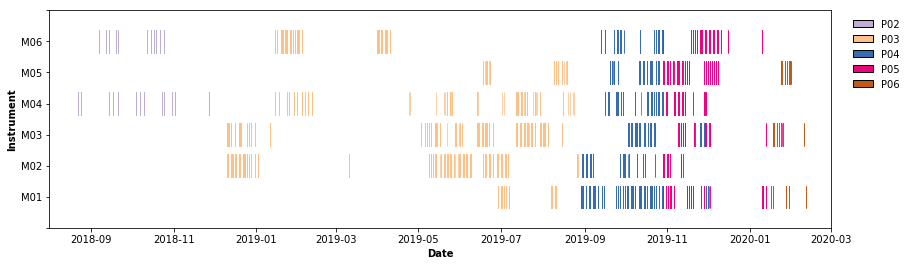

In [6]:
plot_df = df_sample_map.copy()
for x in plot_df.index.tolist():
    plot_df.loc[x,'Date'] = pd.Timestamp(plot_df.loc[x,'Date'])
plot_df['Instrument'] = plot_df['Instrument'].str.replace('M0','')
plot_df['Instrument'] = plot_df['Instrument'].astype(float)
fig = plt.figure(figsize=[14,4])
plot = sns.scatterplot(x='Date', y='Instrument', data=plot_df, palette=PALETTE_BATCH, hue='Batch', marker='|', s=500)
plot.set_xlim(pd.Timestamp('2018-08-01'),pd.Timestamp('2020-03-01')) # Checked date range
plot.set_xlabel('Date', weight='bold')
plot.set_ylabel('Instrument', weight='bold')
plot.set_yticklabels(['','M01','M02','M03','M04','M05','M06',''])
plot.set_ylim(0,7)
plot.legend_.remove()
plt.legend(batch_patch, list(PALETTE_BATCH.keys()), frameon=False, bbox_to_anchor=[1.1,1])
plt.savefig('figures/batch_design.pdf', dpi=500, bbox_inches='tight')
plt.savefig('figures/batch_design.png', dpi=500, bbox_inches='tight')
plt.show()

##### Category A-C proteins

In [7]:
plot_df = (df_frozen.count()/df_frozen.shape[0]*100).to_frame('Freq')
cat_a = plot_df[lambda x: x.Freq >= 90].index.tolist()
cat_b = plot_df[lambda x: (x.Freq >= 20) & (x.Freq < 90)].index.tolist()
cat_c = plot_df[lambda x: x.Freq < 20].index.tolist()
print('Category A:',len(cat_a))
print('Category B:',len(cat_b))
print('Category C:',len(cat_c))

Category A: 2944
Category B: 3939
Category C: 1615


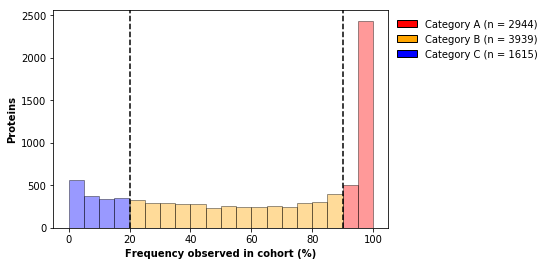

In [20]:
plot_df = (df_frozen.count()/df_frozen.shape[0]*100).to_frame('Freq')
plot = sns.distplot(plot_df.loc[cat_a]['Freq'], bins=2, kde=False, color='red', hist_kws=dict(edgecolor='black'))
plot = sns.distplot(plot_df.loc[cat_b]['Freq'], bins=14, kde=False, color='orange', hist_kws=dict(edgecolor='black'))
plot = sns.distplot(plot_df.loc[cat_c]['Freq'], bins=4, kde=False, color='blue', hist_kws=dict(edgecolor='black'))
plot.axvline(x=20, color='black', linestyle='--')
plot.axvline(x=90, color='black', linestyle='--')
plot.set_xlabel('Frequency observed in cohort (%)', weight='bold')
plot.set_ylabel('Proteins', weight='bold')

# Create figure legend text
labels = ['Category A (n = '+str(len(cat_a))+')',
          'Category B (n = '+str(len(cat_b))+')',
          'Category C (n = '+str(len(cat_c))+')']
custom_patch = []
custom_patch.append(Patch(facecolor='red', edgecolor='black'))
custom_patch.append(Patch(facecolor='orange', edgecolor='black'))
custom_patch.append(Patch(facecolor='blue', edgecolor='black'))
plot.legend(custom_patch, labels, bbox_to_anchor=(1,1), frameon=False)

plt.savefig('figures/category_a_to_c.pdf', dpi=500, bbox_inches='tight')
plt.savefig('figures/category_a_to_c.png', dpi=500, bbox_inches='tight')
plt.show()

##### Tissue-specific heatmap

In [37]:
tissue_counts = df_map.groupby('Tissue_type').count()
tissues_incl = tissue_counts[lambda x: x.Cell_line > 10].index.tolist()
tissue_counts = tissue_counts.to_dict()['Cell_line']
plot_df = df.copy()
plot_df = plot_df.join(df_map['Tissue_type']).groupby('Tissue_type').count().transpose()[tissues_incl]
for tissue in tissues_incl:
    plot_df[tissue] = plot_df[tissue]/tissue_counts[tissue]*100
plot_df = plot_df.transpose()
protein_list = []
tissue_spec_dict = {}
for tissue in tissues_incl:
    tissue_spec_dict[tissue] = []
for protein in plot_df.columns.tolist():
    high_freq = plot_df[lambda x: x[protein] > 50].index.tolist()
    if len(high_freq) <= 2:
        for n in high_freq:
            tissue_spec_dict[n].append(protein)
            protein_list.append(protein)
protein_list = list(set(protein_list))
plot_df = plot_df.reset_index().rename(columns={'Tissue_type':' '}).set_index(' ')[protein_list]
print('Number of tissue-specific proteins:',len(protein_list))

Number of tissue-specific proteins: 775


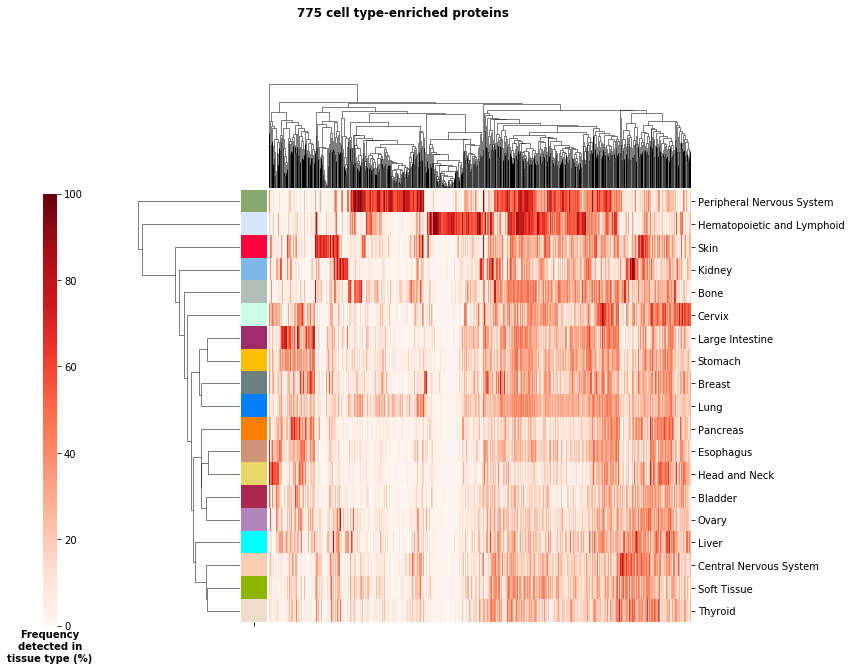

In [10]:
df_colours = pd.DataFrame.from_dict(PALETTE_TTYPE, orient='index').rename(columns={0:''})
plot = sns.clustermap(plot_df, figsize=[10,10], row_cluster=True, col_cluster=True, xticklabels=False, yticklabels=True, row_colors=df_colours, cmap='Reds')
plot.fig.suptitle(str(len(protein_list))+' cell type-enriched proteins', weight='bold', ha='center')
plot.cax.set_position((0,0.12,0.02,0.6))
plt.xlabel('Frequency\ndetected in\ntissue type (%)', weight='bold')
plt.savefig('figures/tissue_specific_heatmap.pdf', dpi=500, bbox_inches='tight')
plt.savefig('figures/tissue_specific_heatmap.png', dpi=500, bbox_inches='tight')
plt.show()

##### Tissue-specific protein counts

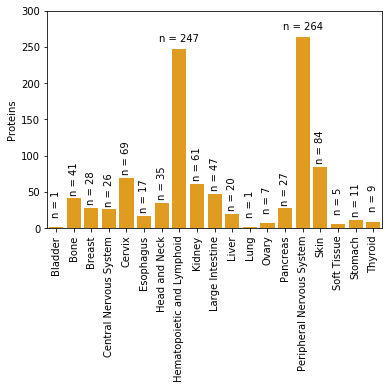

In [11]:
plot_df = pd.DataFrame(index=tissue_spec_dict)
for tissue in tissue_spec_dict:
    plot_df.loc[tissue,'Proteins'] = len(tissue_spec_dict[tissue])
plot = sns.barplot(x='index', y='Proteins', data=plot_df.reset_index(), color='orange')
plot.set_xlabel('')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
# plot.set_title('Tissue-specific proteins', weight='bold')
plot_df = plot_df.reset_index().reset_index().set_index('index')
plot_df['Proteins'] = plot_df['Proteins'].astype(int)
for tissue in plot_df.index.tolist():
    if plot_df.loc[tissue,'Proteins'] < 100:
        rot=90
        y_val=40
    else:
        rot=0
        y_val=10
    plot.text(plot_df.loc[tissue,'level_0'], plot_df.loc[tissue,'Proteins']+y_val, 'n = '+str(plot_df.loc[tissue,'Proteins']), rotation=rot, ha='center')
plot.set_ylim(0,300)
plt.savefig('figures/tissue_specific_bar_plot.pdf', dpi=500, bbox_inches='tight')
plt.savefig('figures/tissue_specific_bar_plot.png', dpi=500, bbox_inches='tight')
plt.show()

##### Generate input for GSEA

In [12]:
df_tissue_spec = pd.DataFrame()
num = 0
for tissue in tissue_spec_dict:
    for protein in tissue_spec_dict[tissue]:
        df_tissue_spec.loc[num,'Tissue'] = tissue
        df_tissue_spec.loc[num,'Protein'] = protein
        num += 1
df_tissue_spec.to_csv('figures/tissue_specific_protein_list.txt', sep='\t', index=False)
# 7a232dc77cc68ce62bcedbd395e1ed65  e0022_cell_lines_diann_reanalysis/figures/tissue_specific_protein_list.txt

In [13]:
tissues_of_interest = ['Hematopoietic and Lymphoid','Peripheral Nervous System','Skin']
for tissue in tissues_of_interest:
    pd.DataFrame(index=[prot_gene_dict[x] for x in tissue_spec_dict[tissue]]).reset_index().to_csv('figures/tissue_specific_proteins_'+tissue.replace(' ','_')+'.txt', sep='\t', index=False, header=False)
# b3a7856856fc237e8985418332865461  e0022_cell_lines_diann_reanalysis/figures/tissue_specific_proteins_Hematopoietic_and_Lymphoid.txt
# deb4ebf35f7b9955e7dfbda3b23fa04e  e0022_cell_lines_diann_reanalysis/figures/tissue_specific_proteins_Peripheral_Nervous_System.txt
# 8e4318a1ffa2ba5b9dba7902211f9535  e0022_cell_lines_diann_reanalysis/figures/tissue_specific_proteins_Skin.txt

##### Get RNA~protein correlations across tissue type

In [26]:
df_rna = pd.read_csv('../files_e0022_cell_lines_diann_reanalysis/rnaseq_voom.csv.gz').rename(columns={'Unnamed: 0':'index'}).set_index('index')
df_rna = df_rna[[x for x in df_rna.columns.tolist() if x in df_map['SIDM'].unique().tolist()]]
df_rna = df_rna.rename(columns=df_map.reset_index().set_index('SIDM').to_dict()['Project_Identifier'])
df_rna = df_rna.transpose().rename(columns=gene_prot_dict)
df_rna = df_rna[[x for x in df_rna.columns.tolist() if x in df.columns.tolist()]]

In [15]:
master_proteins = [x for x in df_rna.columns.tolist() if x in df.columns.tolist()]
master_corr_df = pd.DataFrame()
for tissue in tissues_incl:
    proteins = [x for x in tissue_spec_dict[tissue] if x in master_proteins]
    if len(proteins) > 10:
        cell_lines = [x for x in df_map[lambda x: x.Tissue_type == tissue].index.unique().tolist() if x in df_rna.index.tolist()]
        corr_df = pd.DataFrame()
        for protein in proteins:
            curr_df = df_rna.loc[cell_lines][[protein]].rename(columns={protein:'RNA'}).join(df.loc[cell_lines][[protein]].rename(columns={protein:'Protein'})).dropna()
            corr_df.loc[protein,'Corr'] = scipy.stats.pearsonr(curr_df['RNA'], curr_df['Protein'])[0]
        corr_df_other = pd.DataFrame()
        proteins_other = [x for x in master_proteins if x not in proteins]
        for protein in proteins_other:
            curr_df = df_rna.loc[cell_lines][[protein]].rename(columns={protein:'RNA'}).join(df.loc[cell_lines][[protein]].rename(columns={protein:'Protein'})).dropna()
            if len(curr_df) > 10:
                corr_df_other.loc[protein,'Corr'] = scipy.stats.pearsonr(curr_df['RNA'], curr_df['Protein'])[0]
        master_corr_df.loc[tissue,'Tissue_specific_corr'] = corr_df['Corr'].median()
        master_corr_df.loc[tissue,'Other_corr'] = corr_df_other['Corr'].median()

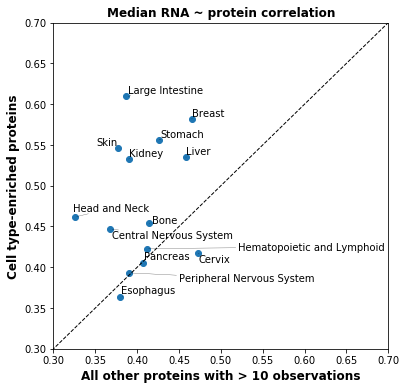

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(master_corr_df['Other_corr'], master_corr_df['Tissue_specific_corr'])
ax.set_title('Median RNA ~ protein correlation', weight='bold', fontsize=12)
ax.set_ylabel('Cell type-enriched proteins', weight='bold', fontsize=12)
ax.set_xlabel('All other proteins with > 10 observations', weight='bold', fontsize=12)
ax.set_xlim(0.3,0.7) #checked
ax.set_ylim(0.3,0.7) #checked
ax.plot([0,1],[0,1], color='black', linewidth=1, linestyle='--')
labels = [ax.text(master_corr_df.loc[tissue,'Other_corr'], master_corr_df.loc[tissue,'Tissue_specific_corr'], tissue, size=10) for tissue in master_corr_df.index.tolist()]
adjust_text(labels, arrowprops=dict(arrowstyle='-', color='k', alpha=0.75, lw=0.3), ax=ax)
plt.savefig('figures/tissue_specific_rna_corr.pdf', dpi=500, bbox_inches='tight')
plt.savefig('figures/tissue_specific_rna_corr.png', dpi=500, bbox_inches='tight')
plt.show()

In [17]:
print(master_corr_df['Tissue_specific_corr'].min())
print(master_corr_df['Tissue_specific_corr'].max())
print(master_corr_df['Other_corr'].min())
print(master_corr_df['Other_corr'].max())

0.3640191972507533
0.6094235776844924
0.3255411580744506
0.47291234960099293


In [18]:
# from crispy.Utils import Utils
# df_rna = pd.read_csv('../files_e0022_cell_lines_diann_reanalysis/rnaseq_voom.csv.gz').rename(columns={'Unnamed: 0':'index'}).set_index('index')
# df_rna = df_rna[[x for x in df_rna.columns.tolist() if x in df_map['SIDM'].unique().tolist()]]
# df_rna = df_rna.rename(columns=df_map.reset_index().set_index('SIDM').to_dict()['Project_Identifier'])
# df_rna = df_rna.transpose().rename(columns=gene_prot_dict)
# df_rna = df_rna[[x for x in df_rna.columns.tolist() if x in df.columns.tolist()]].transpose()
# genes = df_rna.index.tolist()
# df_rna_gkn = pd.DataFrame({i: Utils.gkn(df_rna.loc[i].dropna()).to_dict() for i in genes})
# df_rna_gkn.to_csv('matrix_diann_normalised_051021/rna_seq_gkn.txt', sep='\t')
# 26fe4c5a205876b60e8ddbd439c54319  matrix_diann_normalised_051021/rna_seq_gkn.txt

##### Check overall RNA~protein correlation

In [29]:
corr_df = pd.DataFrame()
for prot in df.columns.tolist():
    if prot in df_rna.columns.tolist():
        tmp_df = df[[prot]].rename(columns={prot:'Protein'}).join(df_rna[[prot]].rename(columns={prot:'RNA'})).dropna()
        if len(tmp_df) > 2:
            corr_df.loc[prot,'Corr'] = scipy.stats.pearsonr(tmp_df['Protein'], tmp_df['RNA'])[0]

In [30]:
corr_df['Corr'].median()

0.41598090642662494

In [31]:
corr_df['Corr'].mean()

0.4049249272468381